
# 第 7 章

このチュートリアルでは、ファイルに含まれている Simulation クラスを使用して、グラフ、ノードの初期状態、およびノードの状態遷移を指定することにより、ノードのダイナミクスをシミュレートする方法を示す。

目次：
1. シミュレーションクラス
2. 投票者モデル
3. SIS モデル
4. 結論

# 1. シミュレーションクラス

このフォルダには、`Simulation` クラスを含む `simulation.py`ファイルがある。このクラスを使用すると、シミュレーションの記述の手間が省かれて、注目すべき部分に集中することができる。

##  1.1 シミュレーションの構成

シミュレーションは、次の 3 つの主要部分で構成される
1. ノードダイナミクスをシミュレートする環境となるグラフ
2. 各ノードの初期状態
3. 状態の遷移（ここでは関数として定義される）

### 1.1.1 グラフ

これは簡単で NetworkX の Graph インスタンスがあればよい。この例では、ランダムグラフを使用する。形の整ったグラフが得られるまで、次のセルを何度か実行する。


In [ ]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

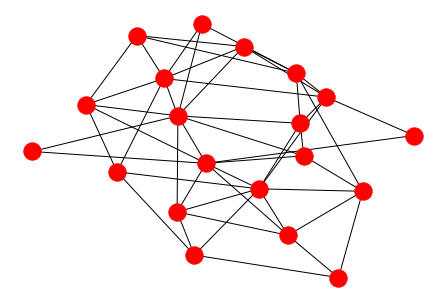


### 1.1.2 初期状態

これらのシミュレーションでは、状態は辞書として表され、キーはノード名で、値はノードの状態である。初期状態をオブジェクトとして直接指定するか、状態辞書を生成する関数を指定することができる。

関数のバージョンの方がわかりやすいので、これを使用して、すべてのノードが同じ状態 `'asleep'` をもつ単純な初期状態を生成しよう。


In [2]:
# initial_state 関数は1つの引数、グラフ・インスタンスを取る

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state


下記のようにテストすることで、この関数がグラフで機能し、各ノードの状態値を含む辞書を生成することを確認できる。


In [3]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}


これは良さそうだ。

###  1.1.3 状態遷移

シミュレーションの核となるのは、状態遷移関数で、これは、*ダイナミクス*を指定するものである。この関数は、グラフと、辞書として提供された現在のノード状態の2つの引数（からなる辞書）を受け取り、更新された状態の辞書を返す。

この単純な例では、各シミュレーションのステップで、`'asleep'` 状態の各ノードが一定の確率で `'awake'` 状態に遷移する。このスリープ状態のノードが各ステップで目覚める確率は `P_AWAKEN` として指定される。

ある確率で事象を発生させるためには、 `random.random()` 関数を使用して 0 と 1 の間の乱数を生成し、確率の閾値と比較するのが一般的なやり方である。乱数が確率の閾値を下回っている場合は、事象が発生する。


In [4]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state


この関数は、このステップ中に*変化する*状態のみを提供すればよい。ただし、変化するかどうかにかかわらず、すべてのノードの状態を指定しても支障はない。

状態遷移関数が機能することを確認するために、ドライランをすることもできる。


In [5]:
test_state = initial_state(G)
state_transition(G, test_state)

{5: 'awake', 6: 'awake', 10: 'awake', 11: 'awake', 15: 'awake', 17: 'awake'}


このテストの実行では、一部のノードが `'awake'` 状態に移行することが確認できるはずだが、これは想定通りである。

###  1.1.4 ピースを組み立てる

これで、グラフ、初期状態、状態遷移関数の 3 つが揃った。それらをシミュレーションの名前と一緒に組み合わせ、Simulation オブジェクトを作成しよう。


In [6]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')


ここで指定する`name`引数はオプショナルで、後に生成する図を管理するためだけのものである。

この Simulation オブジェクトには、いくつかの便利なメソッドがある。１番目は、シミュレーションの現在の状態の辞書を返す `.state()` メソッド。


In [7]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}


シミュレーションのステップはまだ行っていないので、初期状態のはずである。

`.draw()` メソッドを使用して、ノードを状態値で色付けしてネットワークを描画することもできる。


In [ ]:
sim.draw()

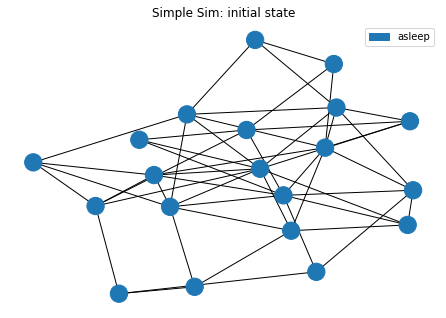


ご覧の通り、初期状態ではすべてのノードが `'asleep'` である。

##  1.2 シミュレーションの実行

初期状態を確認したら、シミュレーションを実行しよう。シミュレーションは離散*ステップ*で進み、各ステップでは状態遷移関数が 1 回実行される。

引数なしの `.run()` メソッドは、シミュレーションを 1 ステップだけ実行する。


In [9]:
sim.run()


状態遷移関数が実行された回数を示す `.steps` プロパティをチェックすることで、シミュレーションが 1 ステップ進んだことを確認できる。


In [10]:
sim.steps

1


`nx.draw()`　関数にキーワード引数を含めることができることを念頭において、1 ステップ後のグラフを見てみよう。


In [ ]:
sim.draw(with_labels=True)

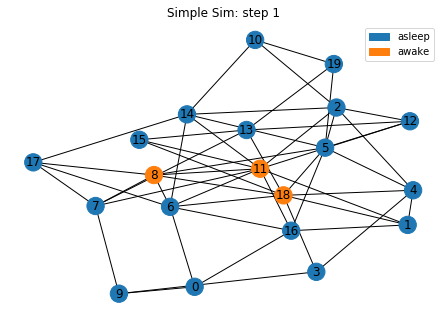


一部のノードが「目覚めた」。これは、シミュレーションの状態でも確認できる。


In [12]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'awake',
 18: 'asleep',
 19: 'asleep'}


`.run()` メソッドに数値を指定すると、一度に複数のステップでシミュレーションを実行できる。


In [13]:
sim.run(10)

In [14]:
sim.steps

11

`.steps` メソッドは、シミュレーションがいくつかのステップ進んだことを確認する。それでは現在の状態を確認してみよう。

In [ ]:
sim.draw(with_labels=True)

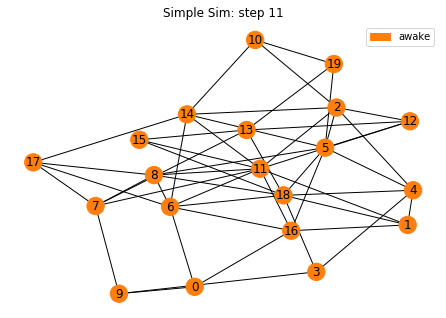


## 1.3 結果の可視化

この時点で、すべてまたはほとんどのノードが目覚めているはずだが、その移行はどのように生じたのだろうか？徐々に、それとも同時にだろうか？`.plot()` メソッドを使用すると、シミュレーションの各ステップで各状態にあるノードの割合をプロットできる。


<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

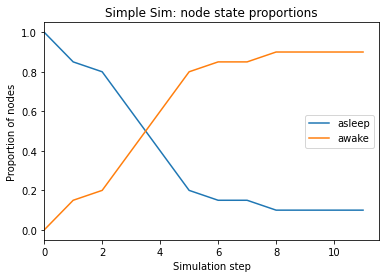

In [16]:
sim.plot()


特定のステップでグラフの状態を可視化する場合は、`.draw()` 関数でそのステップを指定できる。


In [ ]:
sim.draw(4, with_labels=True)

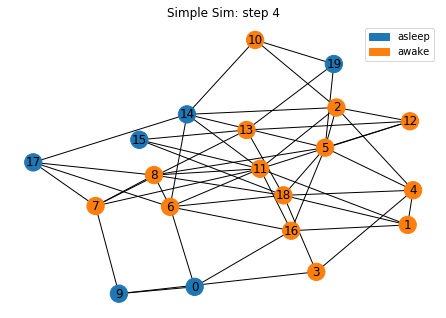


`.state()` メソッドの場合も同様である。


In [18]:
sim.state(4)

{0: 'awake',
 1: 'asleep',
 2: 'asleep',
 3: 'awake',
 4: 'awake',
 5: 'asleep',
 6: 'awake',
 7: 'awake',
 8: 'awake',
 9: 'awake',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'awake',
 16: 'asleep',
 17: 'awake',
 18: 'awake',
 19: 'asleep'}


ステップの一部のみをプロットしたい場合は、プロットする最小および/または最大ステップ数を渡すことでそれが可能である。`.plot()` メソッドに渡される範囲は、Python の `range()` 関数やスライスのように、半開であることに注意してほしい。そのため、`.plot(2, 8)` は 2 から 8 までの状態をプロットするが、8 は*含まない*。


In [ ]:
sim.plot(min_step=2, max_step=8)

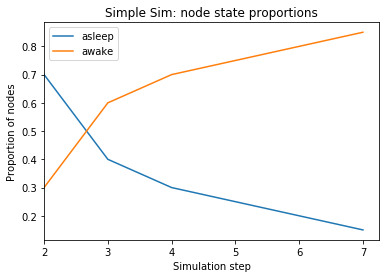


# 2. 投票者モデル

上記の単純な覚醒・睡眠モデルでは、基礎となるグラフ構造を無視し、各ノードのダイナミクスは隣接ノードから独立していた。興味深いネットワークモデルでは、何らかの方法でグラフの連結性を利用している。

投票者モデルは、興味深い結果を生み出すことができるネットワーク上の意見ダイナミクスの単純なモデルである。このモデルは教科書で詳しく説明されている。ここで実装してみよう。

##  2.1 シミュレーションの作成

### 2.1.1 グラフ

前と同じように、ここでも別のランダムグラフを使用する。


In [ ]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

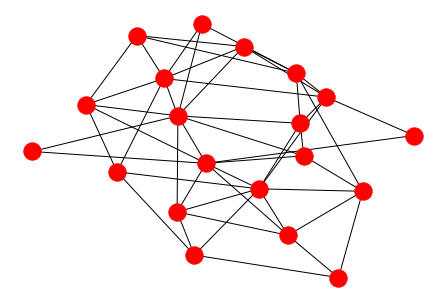


### 2.1.2 初期状態

この初期状態では、2種類に限定せず、A から D までの４通りの文字をランダムに選択して、各ノードに状態を割り当てる。

初期状態関数と状態遷移関数の両方で `random.choice()` を使用する。この関数は、特定のコレクションから 1 つのアイテムをランダムに選択するために使用される。


In [21]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state


これが機能することを確認したい。


In [22]:
initial_state(G)

{0: 'A',
 1: 'B',
 2: 'B',
 3: 'C',
 4: 'C',
 5: 'C',
 6: 'D',
 7: 'C',
 8: 'D',
 9: 'B',
 10: 'C',
 11: 'D',
 12: 'C',
 13: 'B',
 14: 'C',
 15: 'B',
 16: 'C',
 17: 'D',
 18: 'D',
 19: 'A'}


### 2.1.3 状態遷移

投票者モデルの中心となるアルゴリズムは次のように機能する：グラフ内の各ノードに対して、ランダムに隣接ノードを選択し、その「意見」を採択する。つまり、このノードの状態を隣接ノードと同じ値に設定する。

* グラフの各ノードに対し
  * 隣接ノードをランダムに選ぶ
  * このノード状態を選ばれたノードと同じく設定する

In [23]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        # 注意：隣接ノードがない場合は？
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state


先に進む前に、以下をテストしたい。


In [24]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'C',
 1: 'B',
 2: 'B',
 3: 'B',
 4: 'B',
 5: 'A',
 6: 'B',
 7: 'A',
 8: 'D',
 9: 'B',
 10: 'B',
 11: 'A',
 12: 'D',
 13: 'C',
 14: 'A',
 15: 'C',
 16: 'A',
 17: 'C',
 18: 'A',
 19: 'A'}


### 2.1.4 シミュレーションのインスタンス

問題はなさそうなので次は、シミュレーションを作成して初期状態を可視化しよう。


In [25]:
import matplotlib.pyplot as plt

sim = Simulation(G, initial_state, state_transition, name='Voter Model')

In [ ]:
sim.draw()

# 凡例中のラベルの順番を気にする場合、
# .draw() のキーワード引数として 
# labels='ABCD' を指定することができる。

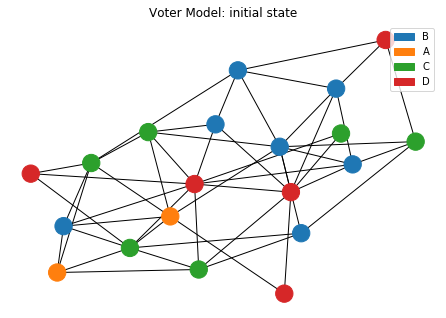


## 2.2 シミュレーションを実行する

このシミュレーションを数ステップ実行して、最終的な結果を見てみよう。


In [27]:
sim.run(40)

In [ ]:
sim.draw()

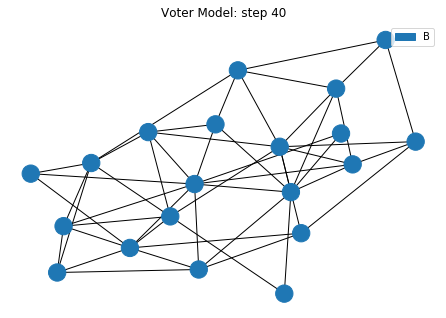


## 2.3 結果を視覚化する

おそらく初期状態とはかなり異なってきているだろう。ここにたどり着くまでの経緯を見てみよう。


In [ ]:
sim.plot()

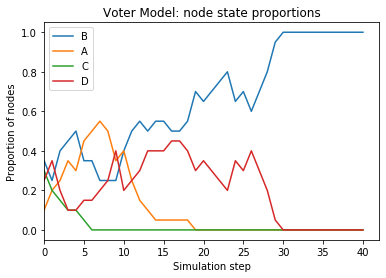

前の数セルをもう一度実行し、シミュレーションを進めて状態を調べ、長期的な定常状態に達するまで続けると、定常状態ですべてのノードは最終的に同じ状態になるはずだ。


## 2.4 同期更新と非同期更新

前述のとおり、この `state_transition` 関数は**同期**更新を行う。つまり、関数が新しい状態を返した後、*すべて*のノードの状態が論理上、同時に更新されのである。


In [30]:
# この例は2.1.3と同じ
import random

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

各ノードの更新が同じ情報に基づいて行われるように、この関数は`current_state` の値を決して変更しない。各ノードは同じ状態を「見ている」ので、ノードを更新する順番は関係ない。これはすべてのノードの状態を同時に更新することと同じである。

その代わりに各ノードは `current_state` をインプレース変更する**非同期**更新を行い、このステップで行われた状態の変更を確認することができる。

In [31]:
# この例はバイアスがかかっているおそれがあるので、使わないこと
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state


この例では、各ノードの `current_state` ビューには、このステップにおける前のノードの更新によって行われた変更が反映されている。

ただし、ここには潜在的な問題がある。それは、`G.nodes` が常に同じ順序でノードを返す可能性が高いため、更新が同じ順序で実行され、バイアスがかかるおそれがあることである。代わりに、毎回ランダムな順序でノードをループする必要がある。


In [32]:
def state_transition_async(G, current_state):
    # 更新順をランダムにすることでバイアスを防ぐ
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state


この新しい状態遷移関数を `Simulation` クラスに渡して利用し、それを実行して上記の同期バージョンと比較することができる。


In [ ]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()

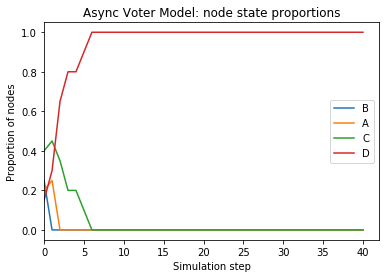


非同期更新は、シミュレーションの特定のダイナミクスに応じて、異なる結果を生成する場合としない場合がある。一方で、同期更新は、仮定の点でわずかに単純であるのが利点となるが、特定の更新メカニズムによっては、非同期更新なしでは定常状態に収束できないことがある。

##  2.5 停止条件

状況によっては、ある条件が真となると、シミュレーションを早期に終了させる条件を指定したい場合がある。この投票者モデルの例では、すべてのノードが同じ状態になると、システムの状態は変更できないことがわかる。必要以上に長くシミュレーションを実行することを避けるために、すべてのノードが同じ状態である場合にシミュレーションを止める停止条件を指定できる。

この関数は、状態遷移関数と同じように、グラフと現在の状態を引数として取り、モデルを停止する必要がある場合は `True` を返す。


In [34]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped


停止条件を指定して投票者モデルの別のインスタンスを作成し、必要と思われるステップ以上で実行してみよう。停止条件にバグがあり、True が返されない場合に備えて、最大ステップ数を指定する必要もある。

In [ ]:
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

ステップ６で停止条件が満たされる


In [ ]:
sim.steps

６

In [ ]:
sim.plot()

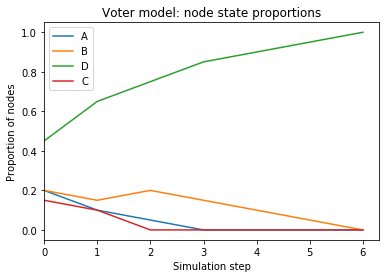


## 2.6 グラフの再配線

状態遷移関数で Graph のインスタンスにアクセスできるため、システムの要求に応じてグラフ内のリンクを追加または削除することができる。投票者モデルを拡張し、状態が異なる場合にノード間のエッジを一定確率で削除することで、ノードが別のノードのと「友達になるのをやめる」こともできるようにしよう。


In [38]:
def state_transition_async_rewiring(G, current_state):
    # 更新順をランダムにすることでバイアスを防ぐ
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            # 前と同じ
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
            # ここは新しい部分
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state

In [ ]:
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,
                 name='Voter Model with rewiring')
sim.draw()

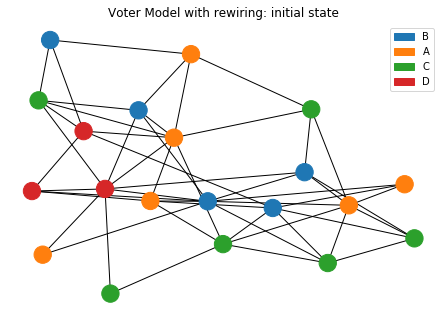

In [ ]:
sim.run(40)
sim.draw()

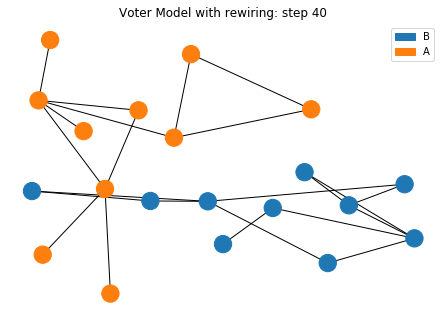

In [ ]:
sim.plot()

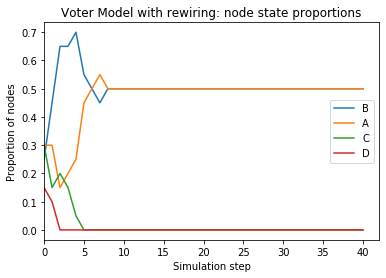


この変更されたシミュレーションの長期的な動作は、以前のモデルとは異なる。多くの場合、ネットワークが分断された構成になり、各ノードにはすべて同じ状態のノードが含まれる。そのため、書かれたとおりの停止条件は発動されない。この状態遷移関数に対して適切な `stop_condition` 関数を作成することは、読者の練習問題として残しておく。



# 3. SIS モデル

これは、ネットワーク上の拡散ダイナミクスの基本的なモデルの 1 つであり、本書で詳しく説明されている。私たちのシミュレーションフレームワークを使用して、この拡散モデルを実装する。

## 3.1 シミュレーションの作成

### 3.1.1 グラフ


In [ ]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

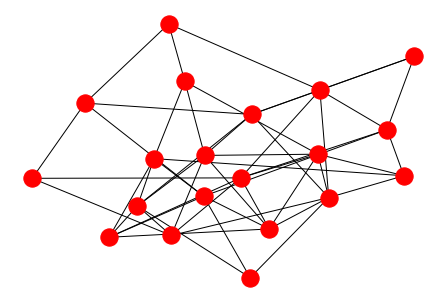


### 3.1.2 初期状態

最初にすべてのノードを「S」状態に割り当て、ランダムに 1 つのノードを選択して「I」状態に設定し、感染させる。「患者ゼロ」ノードの選択を変えて例えば、高次ノードまたは低次ノードを選択することを選択して、それが拡散ダイナミクスにどのように影響するかを確認しよう。


In [43]:
import random

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state


まず、これが機能することを確認しよう。


In [44]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'I',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}


### 3.1.3 状態遷移

SIS モデルには 2 つのパラメーターが含まれる。$\beta$ は、感染した隣接ノードが存在する場合に S から I に遷移する確率であり、$\mu$ は I から S に遷移する確率である。

疑似コードでは、アルゴリズムは以下のとおりとなる

* グラフの各ノードに対して
  * ノードの状態が I の場合
    * ノードは確率 $\mu$ で状態 S に遷移する

  * 上記以外のノードの状態は S となる
    * ノードの隣接ノードそれぞれにかんして
      * 隣接ノードの状態が I の場合
        * ノードは確率 $\beta$ で状態 I に遷移する

モデルのロジックはインデントで少し深くなるが、実際のコードはこの疑似コードに非常によく似ている。


In [45]:
MU = 0.1
BETA = 0.1

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'
        else: # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'

    return next_state


先に進む前に、これをテストしよう
。


In [46]:
test_state = initial_state(G)
state_transition(G, test_state)

{14: 'I'}

パラメータ値によっては、最初の遷移で状態が変化しないことがある。これは問題ではなく、予想される状況である。状態が更新されて空でない辞書が生成されるまでには、数回の試行が必要になる場合もある。コードの正確さをチェックしているだけなので、これを省略しても構わないが、シミュレーションの途中よりもここでデバッグする方が簡単である。



### 3.1.4 シミュレーション

次に、シミュレーションを作成して初期状態を可視化する。


In [47]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')

In [ ]:
sim.draw()

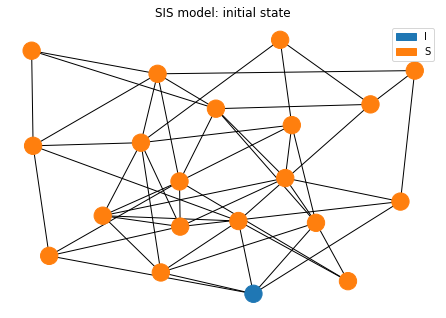


## 3.2 シミュレーションを実行する

このシミュレーションを何ステップか実行して、最終的な結果を見てみよう。


In [49]:
sim.run(25)

In [ ]:
sim.draw()

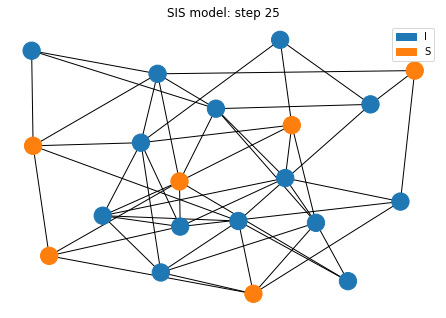


おそらく初期状態とはかなり異なっているだろう。ここまでたどり着いた経緯を見てみよう。


In [ ]:
sim.plot()

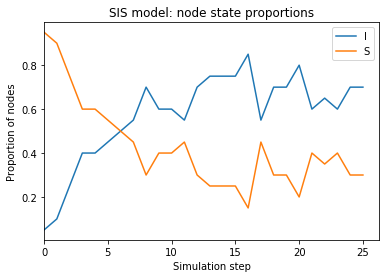


シミュレーションを進め、長期的な安定状態に到達するまで状態を調べながらこれまでのいくつかのセルを再度実行してみよう。最終的には、各ノード状態（IとS）の割合がそれぞれの平均値の周りで変動するため、割合の曲線は平坦になる。

`BETA` および `MU` パラメータ値を調整し、定常状態がどのように変化するかを確認してみよう！


# 4. 結論

投票者モデルとSISモデルという「実際の」モデルのそれぞれにおいて、数多くのステップをまったく同じ方法で実行してみた。これは、異なるシミュレーション間でどの部分が異なり、どの部分が変わらないかを明確に示すためである。これらのモデルを変更したり、独自に書いたりすることは可能であり、ぜひ試してみるべきである。例として、閾値モデルは投票者モデルをそのまま拡張したものであり、SIRモデルはSISモデルを拡張したものである。

また、同じパラメーターを使ったシミュレーションで、グラフが異なるとどのように結果が異なるかを比較することも、探求の一つの方法である。例として、ノードとエッジの数が同じで、バラバシ-アルバートモデルで作成されたグラフと $G_{n,m}$ ランダムグラフで作成されたグラフで、SISの性能は異なるか検証してほしい。